# Assignment 2

Fengdi Li

## 1. Autoencoder

Build and fit a convolutional autoencoder for the Fashion MNIST dataset. The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size. After training your network, visualize some examples of input images and their decoded reconstruction. 

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2982 - val_loss: 0.2985
Epoch 2/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2971 - val_loss: 0.2999
Epoch 3/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.2961 - val_loss: 0.2972
Epoch 4/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.2952 - val_loss: 0.2970
Epoch 5/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.2945 - val_loss: 0.2965
Epoch 6/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.2940 - val_loss: 0.2954
Epoch 7/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2938 - val_loss: 0.2936
Epoch 8/10
60000/60000 [==============================] - 214s 4ms/step - loss: 0.2923 - val_loss: 0.2933
Epoch 9/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2920 - val_loss: 0.2

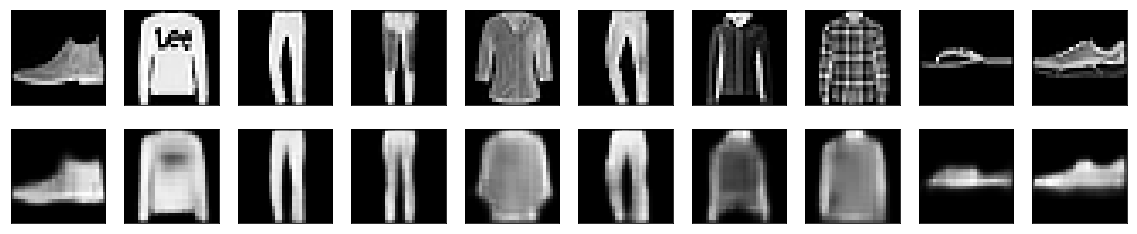

In [0]:
autoencoder.save('Antoencoder.h5')
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification
We’ll continue to use the Fashion MNIST dataset and build a deep convolutional network for classification.

### 2.1 Deep CNN

Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.

In [12]:
# Tools for data transformation
from keras.utils import np_utils

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(Y_train.shape)

(60000,)
[9 0 0 3 0 2 7 2 5 5]
(60000, 10)


In [0]:
# =============================
#  Setting up the Architecture
# ============================
# Declaring sequential model
from keras.models import Sequential
from keras.layers import Dropout, Flatten

model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
# Notice here the the first entry output is none
print(model.output_shape)

# Next we add the remaining layers with 2 by 2 Maxpooling layer and 0.2 Dropout rate
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))

model.add(Dropout(0.2))

# Setting up the fully connected layer with 64 Dense nodes, and 0.2 Dropout rate
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Class layer
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 26, 26, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                65

In [0]:
# =====================
#  Compiling the model
# =====================
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# ===================
# Fitting the model
# ===================
model.fit(x_train, Y_train,
          epochs=10,
          batch_size=128,
          verbose = 1)
# =====================
#  Evaluating the model
# =====================
score = model.evaluate(x_test, Y_test, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.4969 - acc: 0.8241
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3235 - acc: 0.8834
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2733 - acc: 0.8982
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2387 - acc: 0.9126
Epoch 5/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2102 - acc: 0.9216
Epoch 6/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1850 - acc: 0.9302
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1645 - acc: 0.9379
Epoch 8/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1480 - acc: 0.9442
Epoch 9/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.1290 - acc: 0.9507
Epoch 10/10
10000/10000 [==============================] - 1s 86us/step


In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2630166961163282
Test accuracy: 0.9171


The model have a 0.96 accuracy on the training set and 0.92 accuracy on the test set.

In [0]:
import pandas as pd

predicted_values = model.predict_classes(x_test[0:2**9], batch_size=32, verbose=1)
pd.crosstab(predicted_values, y_test[0:2**9],
            rownames=['Predicted Value'], colnames= ['True Value'])

512/512 [==============================] - 0s 178us/step


True Value,0,1,2,3,4,5,6,7,8,9
Predicted Value,,,,,,,,,,
0,50,0,1,1,0,0,0,0,0,0
1,0,53,0,0,0,0,0,0,0,0
2,1,0,63,0,4,0,2,0,0,0
3,0,0,0,41,4,0,2,0,0,0
4,0,0,2,3,47,0,4,0,0,0
5,0,0,0,0,0,40,0,1,0,1
6,5,0,5,1,3,0,39,0,0,0
7,0,0,0,0,0,0,0,47,0,3
8,0,0,0,0,0,0,0,0,45,0


### 2.2 Transfer Learning

Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights 1 should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.

In [0]:
from keras.applications import VGG19
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [0]:
# minimum input size
conv_base = VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))

In [0]:
add_model = Sequential()
add_model.add(conv_base)
add_model.add(Flatten())
add_model.add(Dense(256, activation="relu"))
add_model.add(Dropout(0.25))
add_model.add(Dense(128, activation="relu"))
add_model.add(Dropout(0.25))
add_model.add(Dense(10, activation='softmax'))

In [5]:
conv_base.trainable = False
add_model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32_ref>]

In [6]:
add_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])
add_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [24]:
# Duplicate images in 3 channels
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape (-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])/255.
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])/255.

x_train.shape, x_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [26]:
add_model.fit(x_train, Y_train,
          epochs=10,
          batch_size=128,
          verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.4678 - acc: 0.8290
Epoch 2/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.4529 - acc: 0.8347
Epoch 3/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.4410 - acc: 0.8370
Epoch 4/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.4261 - acc: 0.8441
Epoch 5/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.4201 - acc: 0.8432
Epoch 6/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.4098 - acc: 0.8479
Epoch 7/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.4026 - acc: 0.8520
Epoch 8/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.3954 - acc: 0.8537
Epoch 9/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.3907 - acc: 0.8554
Epoch 10/10
60000/60000 [==============================] - 40s 672us/step - loss: 

In [27]:
# =====================
#  Evaluating the model
# =====================
score = add_model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.4216397376775742
Test accuracy: 0.8466


As presented above, the model has a 0.86 accuracy on training set and 0.85 accuracy on test set, so the previous CNN model performs better.

## 3. Text Classification

In this problem, we will tackle the task of text classification in the context of cybersecurity.

In [0]:
df_benigh = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
df_malicious = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt', header = None)

In [0]:
df_benigh.columns = ['urls']
print(df_benigh.shape)
df_benigh.head()

(66056, 1)


,urls
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [0]:
df_malicious.columns = ['urls']
print(df_malicious.shape)
df_malicious.head()

(1296, 1)


,urls
0,.1337x.pl
1,.1link.io
2,.1n.pm
3,.22apple.com
4,.22find.com


### 3.1 RNN

Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [0]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding

In [0]:
df_benigh['class'] = 1
df_malicious['class'] = 0
np.random.seed(0)

# Downsizing the major class samples due to the extreme imbalance of the dataset
x_1 = df_benigh.sample(frac=5*df_malicious.shape[0]/df_benigh.shape[0]) #5:1
x_1.shape

(6480, 2)

In [0]:
df = pd.concat([x_1, df_malicious], ignore_index = True).reset_index()
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(df['urls'])

X_train = tokenizer.texts_to_sequences(df['urls'])
y_train = df['class']
#y_train = np_utils.to_categorical(df['class'], 2)

max_features = 1000
maxlen = df['urls'].str.len().max()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [0]:
input_train = sequence.pad_sequences(X_train, maxlen)
input_test = sequence.pad_sequences(X_test, maxlen)

In [0]:
input_test.shape

(2333, 86)

In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 64))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [0]:
rnn_model.fit(input_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
5443/5443 [==============================] - 12s 2ms/step - loss: 0.1678 - acc: 0.9339
Epoch 2/10
5443/5443 [==============================] - 11s 2ms/step - loss: 0.0720 - acc: 0.9759
Epoch 3/10
5443/5443 [==============================] - 10s 2ms/step - loss: 0.0605 - acc: 0.9813
Epoch 4/10
5443/5443 [==============================] - 10s 2ms/step - loss: 0.0565 - acc: 0.9840
Epoch 5/10
5443/5443 [==============================] - 12s 2ms/step - loss: 0.0476 - acc: 0.9838
Epoch 6/10
5443/5443 [==============================] - 12s 2ms/step - loss: 0.0489 - acc: 0.9846
Epoch 7/10
5443/5443 [==============================] - 14s 3ms/step - loss: 0.0448 - acc: 0.9859
Epoch 8/10
5443/5443 [==============================] - 12s 2ms/step - loss: 0.0389 - acc: 0.9879
Epoch 9/10
5443/5443 [==============================] - 12s 2ms/step - loss: 0.0419 - acc: 0.9870
Epoch 10/10
5443/5443 [==============================] - 13s 2ms/step - loss: 0.0403 - acc: 0.9879: 0s - loss: 0.041


In [0]:
rnn_model.save('rnn_model.f5')

In [0]:
score = rnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2333/2333 [==============================] - 1s 283us/step
Test loss: 0.06139070950959483
Test accuracy: 0.9858551219303722


### 3.2 CNN

Build and train a 1D CNN for this text classification task. You might gain some insight and inspiration from these text classification approaches:


In [0]:
from keras.layers import Conv1D

cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 86, 64)            64000     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 84, 32)            6176      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2689      
Total params: 72,865
Trainable params: 72,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn_model.fit(input_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
5443/5443 [==============================] - 5s 1ms/step - loss: 0.1988 - acc: 0.9138
Epoch 2/10
5443/5443 [==============================] - 5s 877us/step - loss: 0.0786 - acc: 0.9752
Epoch 3/10
5443/5443 [==============================] - 5s 883us/step - loss: 0.0647 - acc: 0.9827
Epoch 4/10
5443/5443 [==============================] - 5s 886us/step - loss: 0.0586 - acc: 0.9835
Epoch 5/10
5443/5443 [==============================] - 5s 937us/step - loss: 0.0544 - acc: 0.9855
Epoch 6/10
5443/5443 [==============================] - 5s 864us/step - loss: 0.0516 - acc: 0.9844
Epoch 7/10
5443/5443 [==============================] - 5s 859us/step - loss: 0.0475 - acc: 0.9857
Epoch 8/10
5443/5443 [==============================] - 5s 887us/step - loss: 0.0463 - acc: 0.9875
Epoch 9/10
5443/5443 [==============================] - 5s 888us/step - loss: 0.0451 - acc: 0.9868
Epoch 10/10
5443/5443 [==============================] - 6s 1ms/step - loss: 0.0417 - acc: 0.9877


In [0]:
score = cnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2333/2333 [==============================] - 0s 146us/step
Test loss: 0.07423437692734353
Test accuracy: 0.9841405912831368


### 3.3

Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

In [0]:
from sklearn.metrics import roc_curve

y_pred_rnn = rnn_model.predict(input_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)

y_pred_cnn = cnn_model.predict(input_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)

In [0]:
from sklearn.metrics import auc
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

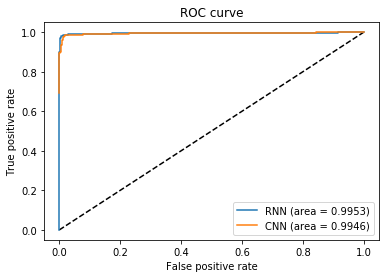

In [0]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.4f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.4f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

According to the ROC curve above, both the CNN and RNN have a AUC score extremely close to 1 (RNN is slightly higher), which indicates their performance is very good.